In [1]:
#importing needed packages
%matplotlib ipympl
import matplotlib.pyplot as plt
import indentoolbox as itb #here the core module of itb package is imported
import os
import numpy as np

# Example supported thin film nanoindentation

An ITO based thin film has been deposited on glass substrate.
In this example we illustrate how indentoolbox can be used to load and plot data.
Data are recorded with a MTS XP on a DCMII head

## nominal substrate elastic properties
Young's modulus E = 71 GPa
Poisson's ratio nu = 0.22

## import from XP DCM II


### tip selection

In [2]:
#creating a black set-up
setup = {}

# most of commercial software express tip coefficients by a fit of contact ares in nm² and contact depth in nm
# TODO: add utility function
# coefficients in "nm" format
# TODO: coefficients for this tip should be read on instrument at SGR
ti_coefficients = np.array([2.598, 4063.401407, -276548.367122, 2862958.007799, -7318518.1323, 4766427.475016])
max_im1 = len(ti_coefficients)
i = np.arange(max_im1)
pov = np.power(2*np.ones(max_im1), 1-i)
# coefficients in "m" format
coefficients = list(ti_coefficients * np.power(10**9, pov))

#selecting tip
setup["tip"] = itb.core.PyramidTip(coefficients = coefficients, 
                                   young_modulus=1141.0e9, 
                                   poisson_coefficient=0.07)


In [3]:
#protocol = None # If left to None, the test protocol will be inferred by the parser.
protocol = ["ConicalLoadingStep"] # Use your own protocol: None ignores a step and otherwise a class name is provided
protocol

['ConicalLoadingStep']

### files import

In [4]:
folder = r"datasets/xp/dcmII/ITO_180nm_supported_on_glass/"

In [17]:
file_name = "0perc.xls"
tests = itb.io.load_dcmii(folder+file_name)

## Sample


In [18]:
sample = itb.core.Sample(name = "Salaise 2022", provider = "Gaelle Voisin")
setup["sample"] = sample
display(sample)

Sample(name='Salaise 2022', provider='Gaelle Voisin')

## Device

In [19]:
device = itb.core.Device(name = "MTS XP", institute = "Saint-Gobain Research Paris", compliance = 0., provider = "MTS")
setup["device"] = device

In [26]:
## Creating batch

In [20]:
setup["tests"] = tests
batch = itb.core.Batch(**setup)

## Basic Plots

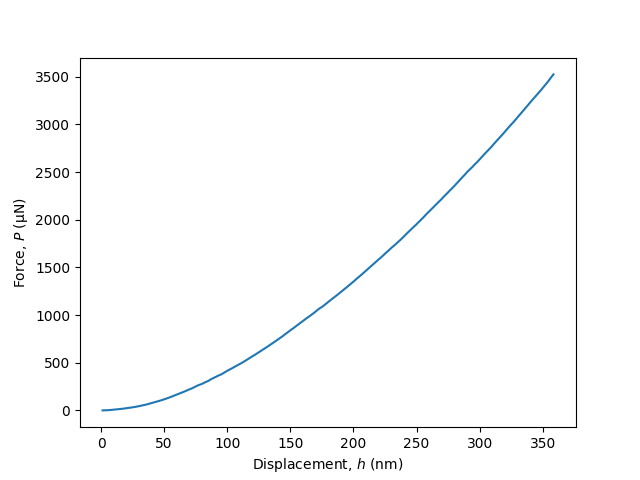

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for step in batch.tests[-1].steps:
    ax.plot(step.data['disp']*1e9, step.data['force']*1e6)
    
ax.set_xlabel("Displacement, $h$ (nm)")
ax.set_ylabel("Force, $P$ (µN)")
plt.show()

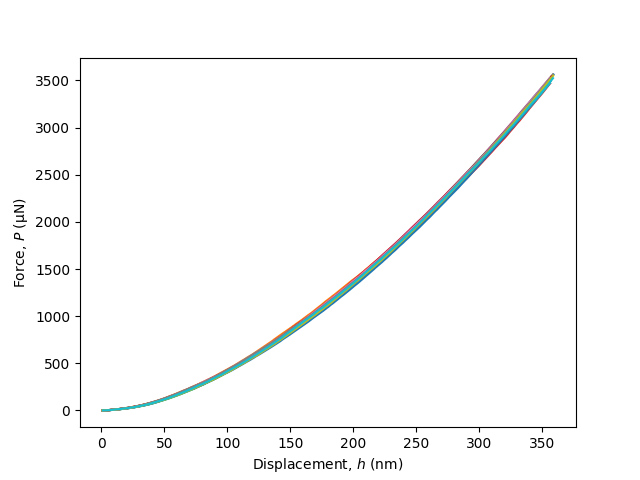

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for test in batch.tests:
    ax.plot(test.data['disp']*1e9, test.data['force']*1e6)

ax.set_xlabel("Displacement, $h$ (nm)")
ax.set_ylabel("Force, $P$ (µN)")
plt.show()

In [ ]:
## TODO: plot hardness and modulus for example
## TODO: redo analysis on dynamic data with Oliver and Pharr